<a href="https://colab.research.google.com/github/akitim/SkillFactory_current/blob/main/MATH%26ML_7_%D0%9F%D1%80%D0%B0%D0%BA%D1%82%D0%B8%D0%BA%D0%B0_%D0%9D%D0%B0%D0%B8%D0%B2%D0%BD%D1%8B%D0%B9_%D0%B1%D0%B0%D0%B9%D0%B5%D1%81%D0%BE%D0%B2%D1%81%D0%BA%D0%B8%D0%B9_%D0%BA%D0%BB%D0%B0%D1%81%D1%81%D0%B8%D1%84%D0%B8%D0%BA%D0%B0%D1%82%D0%BE%D1%80_%D1%88%D0%B0%D0%B1%D0%BB%D0%BE%D0%BD_%D0%90%D0%BA%D0%B8%D0%BC%D0%BA%D0%B8%D0%BD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация текстов с использованием Наивного Байесовского Классификатора

## Задание 1 (1 балл)

Откройте данные. Узнайте, сколько в них спам- и не спам-писем. Визуализируйте полученные соотношение подходящим образом.

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
# import plotly.express as px

# from scipy import stats
# from sklearn import linear_model
# from sklearn import preprocessing
# from sklearn import model_selection
# from sklearn import tree
# from sklearn import ensemble
# from sklearn import metrics
# from sklearn import cluster
# from sklearn import feature_selection

import warnings
warnings.filterwarnings("ignore")

# from sys import getsizeof
# import pickle

# from google.colab import drive
# drive.mount('/content/drive')

path = "https://raw.githubusercontent.com/akitim/datasets/main/SMSSpamCollection.zip"
data = pd.read_csv(path, header=None, sep='\t', names=['label', 'SMS'])
data.sample(5)


,label,SMS
2427,spam,Valentines Day Special! Win over £1000 in our ...
145,ham,Yes see ya not on the dot
2356,ham,"Hello, my love ! How went your day ? Are you a..."
2451,ham,K..give back my thanks.
665,ham,Yes baby! We can study all the positions of th...


In [41]:
# частоты классов
class_freq = data['label'].value_counts() / data['label'].size
labels = class_freq.index.to_list()
class_freq

ham     0.865937
spam    0.134063
Name: label, dtype: float64

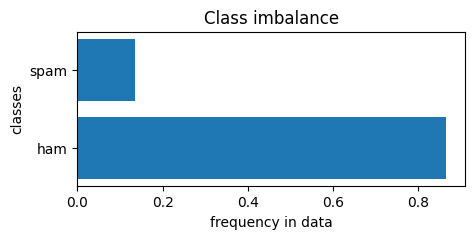

In [42]:
fig, ax = plt.subplots(1, 1, figsize=(5, 2))
ax.barh(labels, class_freq );
ax.set_ylabel('classes');
ax.set_xlabel('frequency in data');
ax.set_title('Class imbalance');


In [43]:
# delete
# plt.hist(data.SMS.apply(len).apply(np.log2), bins='rice');
# plt.gca().set_yscale('log')
data[data.SMS.apply(len)<5].SMS

261      Yup
287     Ok..
1612     645
1925      Ok
2182     Ok.
2602    Okie
2688    Okie
3051      Ok
3376     :) 
3492     Ok.
3833     Ok.
3901    Okie
4014     Ok.
4498      Ok
5173    U 2.
5188    Okie
5357      Ok
5471     Yup
Name: SMS, dtype: object

## Задание 2 (2 балла)

Вам необходимо предобработать ваши данные и перевести их в векторный вид. Подгрузим необходимый модуль:

In [44]:
from sklearn.feature_extraction.text import CountVectorizer

Замените в данных все пустые строки и строки, состоящие из пробелов, на пропуски (NaN). После этого удалите из данных все строки, в которых наблюдаются пропущенные значения.

In [45]:
display(data[data['SMS'].apply(lambda s: s.isspace()) | data['SMS'] == ''])
#пустые строки и строки с пробелами отсутствуют

,label,SMS


Переводим данные в векторный вид:

In [47]:
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(data["SMS"])


Определите, сколько теперь признаков в нашем наборе данных:

In [50]:
print("В наборе данных признаков]", X.shape[1])

8713

## Задание 3 (2 балла)

Определите целевую переменную и признаки:

In [ ]:
#ваш код здесь

Разделите выборку на обучающую и тестовую, используя стратифицированное разбиение (параметр `stratify` установите в значение вектора ответов y) размер тестовой выборки (`test_size`) возьмите как 0.25, параметр `random_state` определите со значением 42:

In [ ]:
#ваш код здесь

Рассчитайте среднее значение целевой переменной по тестовой выборке:

In [ ]:
#ваш код здесь

## Задание 4 (3 балла)

Определите и обучите подходящий алгоритм с параметром alpha = 0.01

In [ ]:
#ваш код здесь

Оцените результат с точки зрения всех известных вам метрик (не менее трёх):

In [ ]:
#ваш код здесь

Нарисуйте ROC-кривую:

In [ ]:
#ваш код здесь

## Задание 5 (3 балла)

Переберите несколько значений alpha с помощью кросс-валидации. Оцените, зависит ли от этого параметра качество классификации.

In [ ]:
#ваш код здесь